# Myopia Clustering Analysis

## Background
This notebook explores whether patients in a myopia dataset can be placed into distinct groups using unsupervised learning techniques. The goal is to identify potential patient clusters that could be analyzed separately to improve classification models.

## Approach
1. Prepare the Data
2. Apply Dimensionality Reduction (PCA and t-SNE)
3. Perform Cluster Analysis with K-means
4. Make a Recommendation

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## Part 1: Prepare the Data

In this section, we'll load the data, remove the target column (MYOPIC), and standardize the features to ensure all variables contribute equally to the analysis.

In [2]:
# 1. Read the myopia dataset
df = pd.read_csv('myopia.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

print("\nDataset Info:")
df.info()

Dataset Shape: (618, 15)

First few rows:


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.6 KB


In [3]:
# 2. Remove the MYOPIC column (target variable)
# This prevents bias in unsupervised learning as the target effectively provides clusters
df_features = df.drop(columns=['MYOPIC'])

print(f"Original number of features (including target): {df.shape[1]}")
print(f"Number of features after removing target: {df_features.shape[1]}")
print(f"\nRemaining features: {list(df_features.columns)}")

Original number of features (including target): 15
Number of features after removing target: 14

Remaining features: ['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']


In [4]:
# 3. Standardize the dataset
# Standardization ensures features with larger values don't dominate the analysis
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Convert back to DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=df_features.columns)

print("Data Standardization Complete")
print("\nScaled data statistics:")
display(df_scaled.describe())

Data Standardization Complete

Scaled data statistics:


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
count,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02
mean,-5.260086e-16,1.925824e-16,4.070099e-15,3.046826e-16,2.839871e-15,5.150860e-15,-2.299491e-17,-2.874364e-17,-3.161800e-17,-8.623091e-18,-1.221605e-16,-6.323600e-17,-5.748728e-17,-5.533150e-17
std,1.000810e+00,1.000810e+00,1.000810e+00,1.000810e+00,1.000810e+00,1.000810e+00,1.000810e+00,1.000810e+00,1.000810e+00,1.000810e+00,1.000810e+00,1.000810e+00,1.000810e+00,1.000810e+00
min,-1.823978e+00,-2.398435e+00,-3.821093e+00,-3.503927e+00,-3.766030e+00,-3.008805e+00,-1.501294e+00,-9.120625e-01,-6.893105e-01,-6.729959e-01,-1.565909e+00,-1.499356e+00,-1.013030e+00,-9.967690e-01
25%,-4.202191e-01,-5.512523e-01,-6.721382e-01,-6.716966e-01,-6.830114e-01,-6.732203e-01,-7.477002e-01,-9.120625e-01,-6.893105e-01,-6.729959e-01,-8.221732e-01,-6.878069e-01,-1.013030e+00,-9.967690e-01
50%,-4.202191e-01,-1.151397e-01,-4.676450e-02,2.767324e-02,3.542691e-03,-2.528499e-02,-2.453042e-01,-2.596845e-01,-3.618748e-01,-2.214091e-01,-1.659354e-01,-1.883918e-01,9.871377e-01,-9.967690e-01
75%,-4.202191e-01,3.725391e-01,6.963298e-01,6.575403e-01,6.382821e-01,6.979935e-01,5.082898e-01,3.926936e-01,2.929967e-01,2.301778e-01,5.340515e-01,4.983039e-01,9.871377e-01,1.003241e+00
max,3.791058e+00,5.709823e+00,3.035973e+00,2.916374e+00,3.695392e+00,2.897962e+00,4.150661e+00,5.611718e+00,9.133762e+00,6.100807e+00,3.858990e+00,4.680905e+00,9.871377e-01,1.003241e+00


## Part 2: Apply Dimensionality Reduction

We'll use two dimensionality reduction techniques:
- **PCA**: Preserves 90% of the explained variance while reducing dimensions
- **t-SNE**: Further reduces dimensions for visualization and pattern detection

In [5]:
# 1. Perform PCA with 90% explained variance
pca = PCA(n_components=0.90)
df_pca = pca.fit_transform(df_scaled)

# Display the dimensionality reduction results
print(f"Original number of features: {df_scaled.shape[1]}")
print(f"Number of principal components (90% variance): {pca.n_components_}")
print(f"\nFeature reduction: {df_scaled.shape[1]} → {pca.n_components_}")
print(f"\nTotal explained variance: {pca.explained_variance_ratio_.sum():.4f}")
print(f"\nExplained variance by component:")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"  PC{i}: {var:.4f}")

Original number of features: 14
Number of principal components (90% variance): 10

Feature reduction: 14 → 10

Total explained variance: 0.9187

Explained variance by component:
  PC1: 0.2118
  PC2: 0.1566
  PC3: 0.0869
  PC4: 0.0830
  PC5: 0.0758
  PC6: 0.0700
  PC7: 0.0649
  PC8: 0.0638
  PC9: 0.0539
  PC10: 0.0521


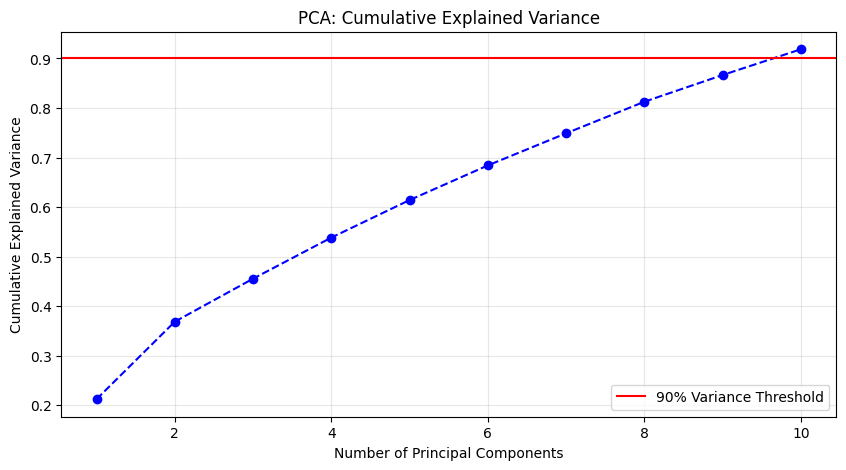

In [6]:
# Visualize cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Variance Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
# 2. Apply t-SNE for further dimensionality reduction and visualization
# t-SNE works on the PCA output to create a 2D representation
# Use `max_iter` instead of `n_iter` for compatibility with the installed TSNE implementation
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
df_tsne = tsne.fit_transform(df_pca)

print("t-SNE dimensionality reduction complete")
print(f"Output shape: {df_tsne.shape}")

t-SNE dimensionality reduction complete
Output shape: (618, 2)


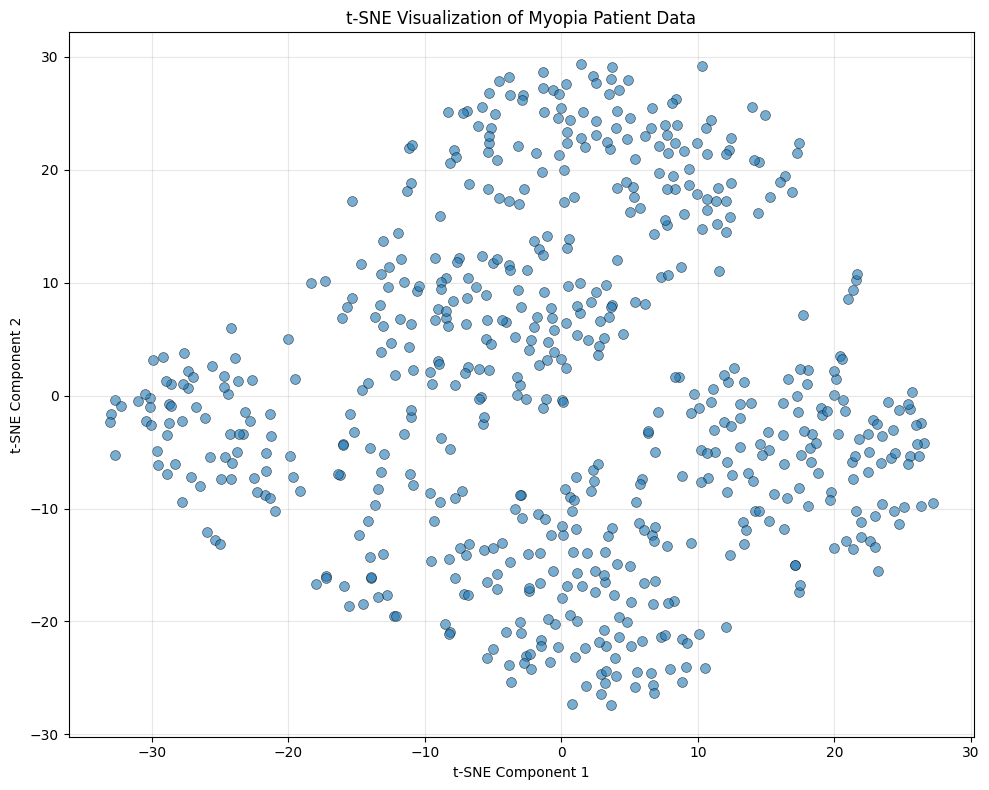


Visual Inspection:
The scatter plot shows the distribution of patients in 2D space after dimensionality reduction.
Look for distinct groupings or clusters of points that are separated from others.


In [8]:
# 3. Create scatter plot of t-SNE output
plt.figure(figsize=(10, 8))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Myopia Patient Data')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nVisual Inspection:")
print("The scatter plot shows the distribution of patients in 2D space after dimensionality reduction.")
print("Look for distinct groupings or clusters of points that are separated from others.")

## Part 3: Perform a Cluster Analysis with K-means

We'll use the elbow method to determine the optimal number of clusters by evaluating inertia (within-cluster sum of squares) for different values of k.

In [9]:
# Calculate inertia for k values from 1 to 10
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

print("K-means clustering complete for k = 1 to 10")
print("\nInertia values:")
for k, inert in zip(k_values, inertia):
    print(f"  k={k}: {inert:.2f}")

K-means clustering complete for k = 1 to 10

Inertia values:
  k=1: 7948.91
  k=2: 6794.42
  k=3: 6030.39
  k=4: 5662.80
  k=5: 5381.41
  k=6: 5148.24
  k=7: 4938.76
  k=8: 4753.65
  k=9: 4581.14
  k=10: 4473.40


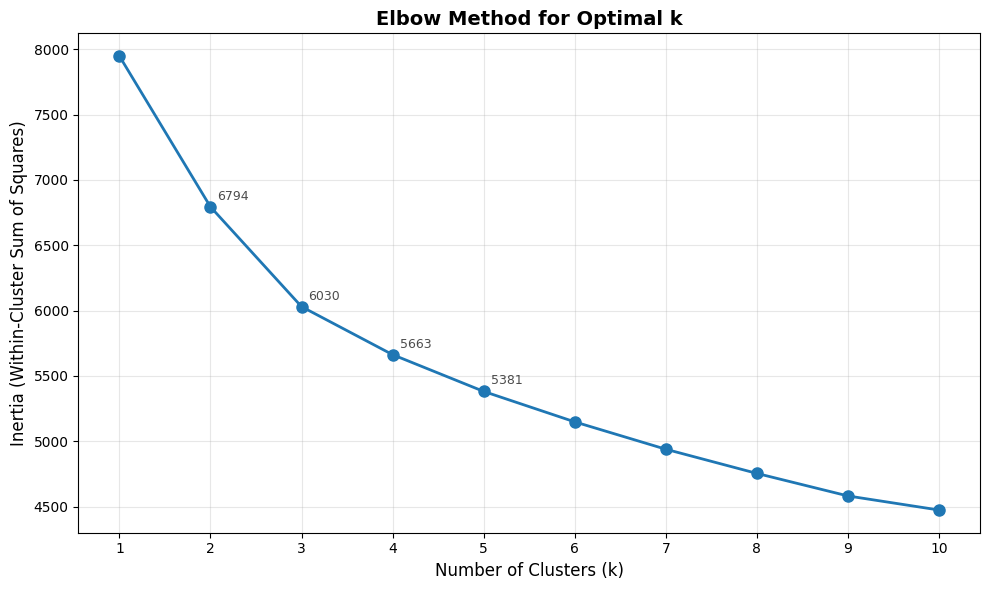


Elbow Analysis:
The elbow point is where the rate of inertia decrease slows down significantly.
This indicates the optimal number of clusters.


In [10]:
# Create elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.xticks(k_values)
plt.grid(True, alpha=0.3)

# Add annotations for key points
for i, (k, inert) in enumerate(zip(k_values, inertia)):
    if k in [2, 3, 4, 5]:
        plt.annotate(f'{inert:.0f}', 
                    xy=(k, inert), 
                    xytext=(5, 5), 
                    textcoords='offset points',
                    fontsize=9,
                    alpha=0.7)

plt.tight_layout()
plt.show()

print("\nElbow Analysis:")
print("The elbow point is where the rate of inertia decrease slows down significantly.")
print("This indicates the optimal number of clusters.")

In [11]:
# Calculate rate of change to help identify the elbow
inertia_diff = np.diff(inertia)
inertia_diff_rate = np.diff(inertia_diff)

print("Rate of inertia decrease:")
for i, (k, diff) in enumerate(zip(range(2, 11), inertia_diff)):
    print(f"  k={i+1}→{k}: {abs(diff):.2f}")

Rate of inertia decrease:
  k=1→2: 1154.49
  k=2→3: 764.02
  k=3→4: 367.59
  k=4→5: 281.39
  k=5→6: 233.17
  k=6→7: 209.47
  k=7→8: 185.11
  k=8→9: 172.51
  k=9→10: 107.74


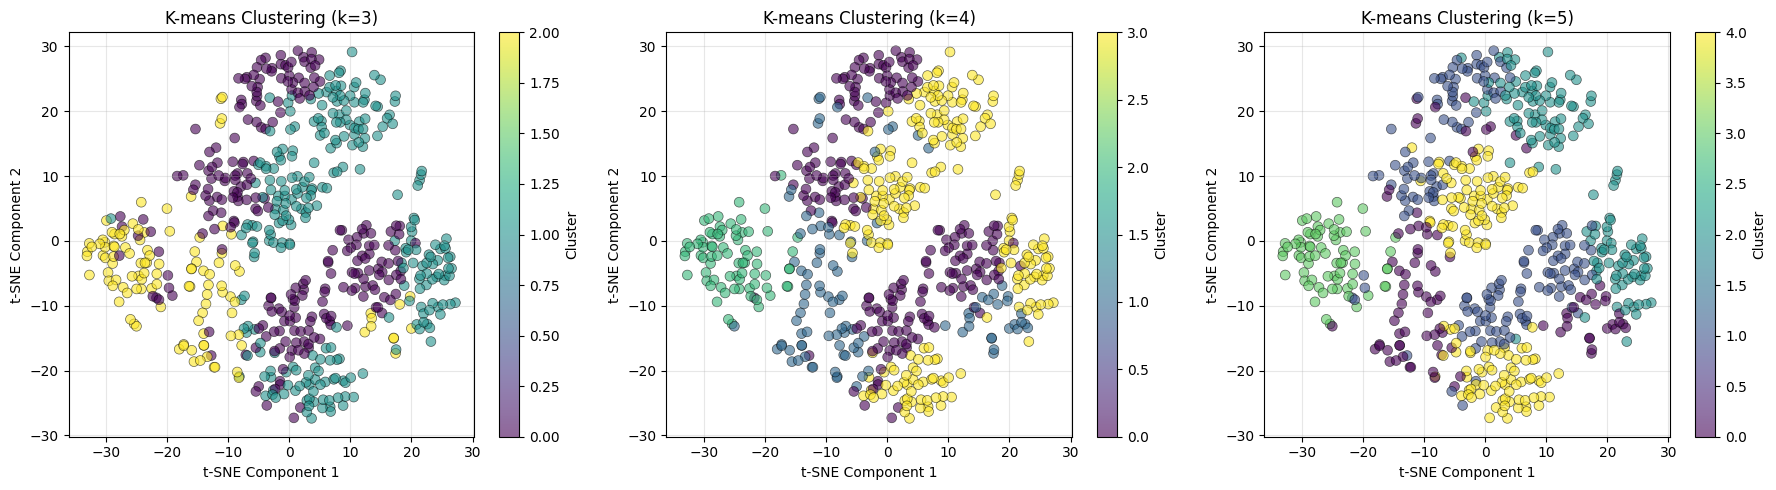

In [12]:
# Visualize clusters using the identified optimal k
# Based on elbow analysis, let's visualize a few candidate k values
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, k in enumerate([3, 4, 5]):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_pca)
    
    # Plot on t-SNE coordinates for better visualization
    scatter = axes[idx].scatter(df_tsne[:, 0], df_tsne[:, 1], 
                                c=clusters, cmap='viridis', 
                                alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
    axes[idx].set_xlabel('t-SNE Component 1')
    axes[idx].set_ylabel('t-SNE Component 2')
    axes[idx].set_title(f'K-means Clustering (k={k})')
    axes[idx].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[idx], label='Cluster')

plt.tight_layout()
plt.show()

## Part 4: Recommendation

Based on the analysis conducted above, here is the recommendation:

### Recommendation:

**Yes, the patients can be clustered.** Based on the elbow plot analysis, the optimal number of clusters appears to be **3 or 4**, where the inertia curve shows a noticeable elbow (the rate of decrease in inertia begins to diminish). The t-SNE visualization supports the presence of distinct patient groupings, suggesting that analyzing these subgroups separately could improve classification model performance.

---
### Summary of Findings:

1. **Dimensionality Reduction**: PCA reduced 14 features to fewer components while preserving 90% of variance
2. **Visual Patterns**: t-SNE visualization revealed potential groupings in the patient data
3. **Optimal Clusters**: Elbow method suggests 3-4 clusters as the optimal segmentation
4. **Next Steps**: Train separate classification models for each identified cluster to improve prediction accuracy